In [3]:
#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Data=pd.read_csv('C:\\Users\\VEDSD\\Project\\Salary Prediction\\stack-overflow-developer-survey-2023\\survey_results_public.csv')

In [5]:
Data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [6]:
Data['Employment'].unique()

array([nan, 'Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Student, full-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time;Student, part-time',
       'Not employed, but looking for work;Student, full-time',
       'Employed, part-time;Student, part-time', 'Employed, part-time',
       'Student, full-time;Employed, part-time', 'I prefer not to say',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Student, part-time',
       'Not employed, but looking for work;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time',
       'Retired', 'Employed, full-time;Student, full-time',
       'Student, full-time;Student, part-time',
       '

In [7]:
df=Data[['Industry','ConvertedCompYearly','Age','RemoteWork','WorkExp','Employment','Country','EdLevel']]

In [8]:
df.isnull().sum()/len(df)

Industry               0.587661
ConvertedCompYearly    0.461574
Age                    0.000000
RemoteWork             0.172385
WorkExp                0.511359
Employment             0.014420
Country                0.013579
EdLevel                0.013579
dtype: float64

In [9]:
df=df.dropna(subset=['ConvertedCompYearly','Employment','RemoteWork','Country'])

In [10]:
df.isnull().sum()/len(df)

Industry               0.421631
ConvertedCompYearly    0.000000
Age                    0.000000
RemoteWork             0.000000
WorkExp                0.319733
Employment             0.000000
Country                0.000000
EdLevel                0.000000
dtype: float64

In [11]:
pd.crosstab(index=1,columns=df['Industry'],margins=True)


Industry,Advertising Services,Financial Services,Healthcare,Higher Education,"Information Services, IT, Software Development, or other Technology",Insurance,Legal Services,"Manufacturing, Transportation, or Supply Chain",Oil & Gas,Other,Retail and Consumer Services,Wholesale,All
row_0,,,,,,,,,,,,,
1,614,3440,1701,866,13461,574,169,1999,206,3010,1551,136,27727
All,614,3440,1701,866,13461,574,169,1999,206,3010,1551,136,27727


In [12]:
df['Industry']=np.where(df['Industry'].isnull()==True,'I[nformation Services, IT, Software Development, or other Technology',df['Industry'])
df['WorkExp']=np.where(df['WorkExp'].isnull()==True,np.mean(df['WorkExp']),df['WorkExp'])

In [13]:
df.isnull().sum()/len(df)

Industry               0.0
ConvertedCompYearly    0.0
Age                    0.0
RemoteWork             0.0
WorkExp                0.0
Employment             0.0
Country                0.0
EdLevel                0.0
dtype: float64

In [14]:
df=df[df['Employment']=='Employed, full-time']
df=df.drop('Employment',axis=1)
df.describe()

,ConvertedCompYearly,WorkExp
count,3.930100e+04,39301.000000
mean,9.839500e+04,11.251656
std,3.323123e+05,7.334675
min,1.000000e+00,0.000000
25%,4.497800e+04,6.000000
50%,7.496300e+04,11.436342
75%,1.234420e+05,12.000000
max,5.751383e+07,50.000000


In [54]:
def Change_Cat(categories,limit):
    categorical_map={}
    for i in range(len(categories)):
        if categories.values[i]>=limit:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]='Other'
    return categorical_map

In [55]:
country_map=Change_Cat(df.Country.value_counts(),500)
df['Country']=df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   10599
United States of America                                10598
Germany                                                  3219
United Kingdom of Great Britain and Northern Ireland     3087
Canada                                                   1814
India                                                    1614
France                                                   1465
Netherlands                                              1005
Australia                                                 990
Spain                                                     974
Brazil                                                    973
Sweden                                                    883
Italy                                                     827
Poland                                                    741
Switzerland                                               512
Name: count, dtype: int64

In [56]:
df=df.rename(columns = {'ConvertedCompYearly':'Salary'})



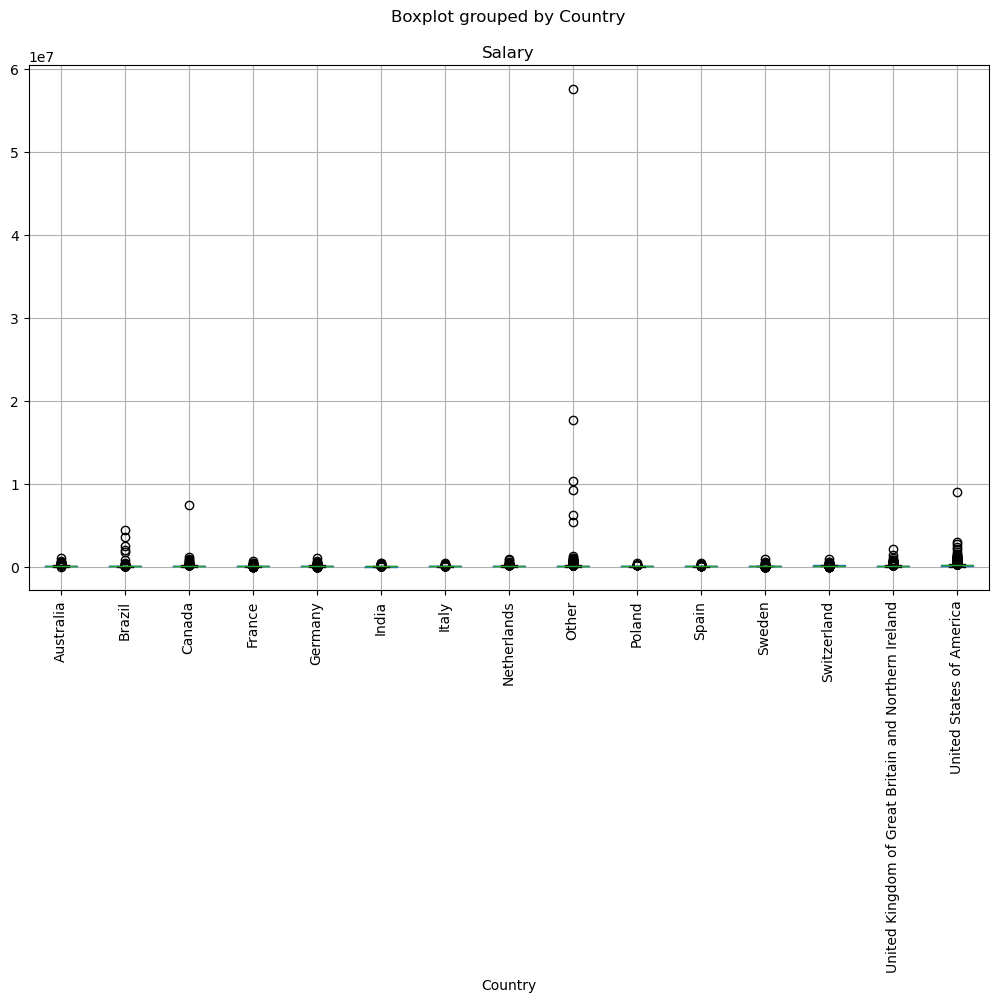

In [57]:
fig, ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.xticks(rotation=90)
plt.show()

In [58]:
df=df[df['Salary']<=(1000000*0.4)]
df=df[df['Salary']>10000]
df.groupby('Country')['Salary'].mean()

Country
Australia                                               100913.140387
Brazil                                                   44702.758294
Canada                                                  100474.361857
France                                                   62248.908276
Germany                                                  79140.299433
India                                                    35607.717544
Italy                                                    47857.448529
Netherlands                                              79592.235887
Other                                                    62945.945595
Poland                                                   57110.173723
Spain                                                    56303.097107
Sweden                                                   63200.981199
Switzerland                                             132022.246000
United Kingdom of Great Britain and Northern Ireland     90877.974820
United State

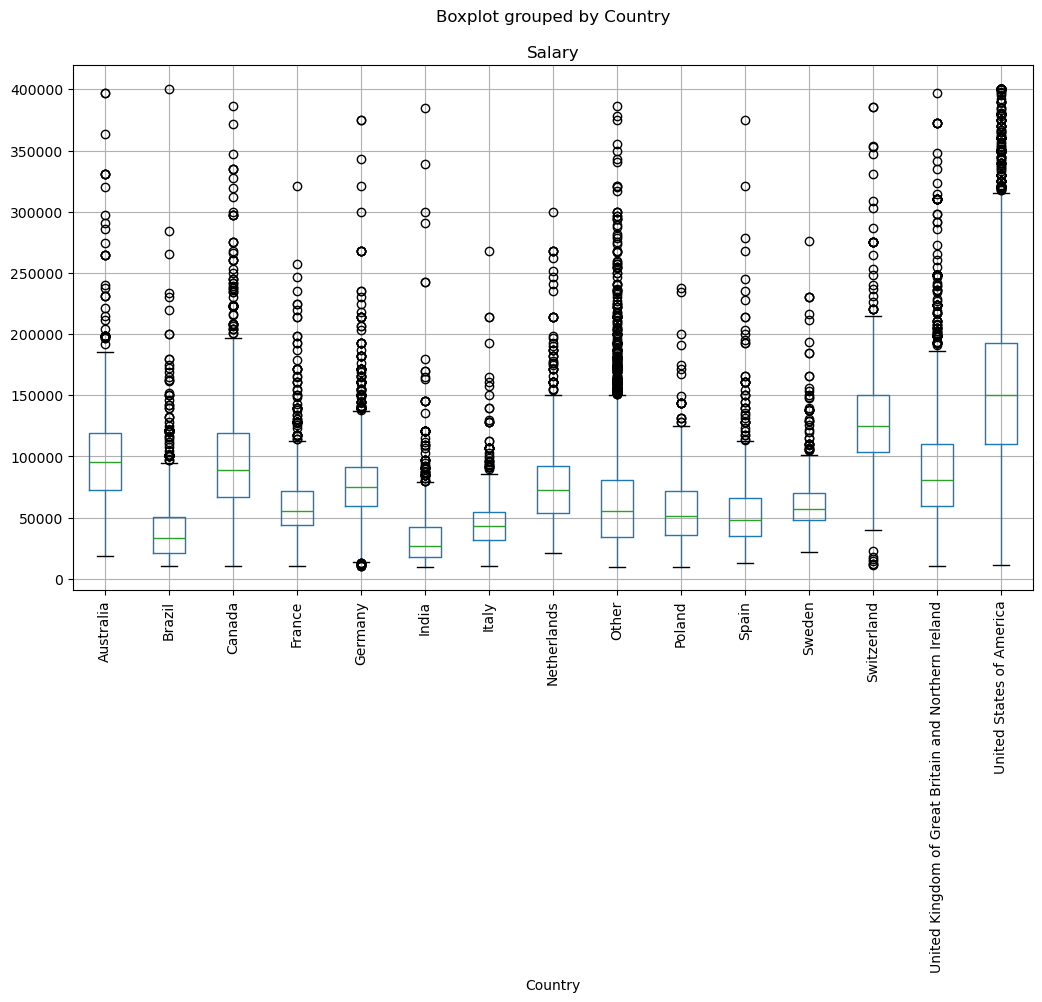

In [59]:
fig, ax=plt.subplots(1,1,figsize=(12,7))
df.boxplot('Salary','Country',ax=ax)
plt.xticks(rotation=90)
plt.show()

In [60]:
df['Industry']=np.where(df['Industry']=='I[nformation Services, IT, Software Development, or other Technology',
                       'Information Services, IT, Software Development, or other Technology',df['Industry'])


In [61]:
df['Industry']=np.where(df['Industry']=='Higher Education',
                       'Other',df['Industry'])
pd.crosstab(index=1,columns=df['Industry'])

Industry,Advertising Services,Financial Services,Healthcare,"Information Services, IT, Software Development, or other Technology",Insurance,Legal Services,"Manufacturing, Transportation, or Supply Chain",Oil & Gas,Other,Retail and Consumer Services,Wholesale
row_0,,,,,,,,,,,
1,467,2718,1389,24889,492,133,1660,166,3169,1258,101


In [62]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [63]:
def clean_WorkEN(x):
    if 'Hybrid' in x:
        return 'Hybrid'
    else:
        return x
df['RemoteWork']=df['RemoteWork'].apply(clean_WorkEN)
df['RemoteWork'].unique()

array(['Remote', 'Hybrid', 'In-person'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder
Encode_Ed=LabelEncoder()
df['EdLevel'] = Encode_Ed.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 1, 2, 3])

In [65]:
Encode_Industry=LabelEncoder()
df['Industry'] = Encode_Industry.fit_transform(df['Industry'])
df["Industry"].unique()

array([ 3,  8,  1,  6,  9,  4,  2,  7, 10,  5,  0])

In [66]:
df['Age'].value_counts()
def clean_Age(x):
    if 'Prefer not to say' in x:
        return '25-34 years old'
    if 'Under 18 years old' in x:
        return '18-24 years old' 
    else:
        return x
df['Age']=df['Age'].apply(clean_Age)
df['Age'].unique()


array(['25-34 years old', '45-54 years old', '35-44 years old',
       '55-64 years old', '18-24 years old', '65 years or older'],
      dtype=object)

In [67]:
Encode_Age=LabelEncoder()
Age_order=['18-24 years old','25-34 years old','35-44 years old','45-54 years old','55-64 years old','65 years or older']
Encode_Age.fit(Age_order)
# Encode age ranges

df['Age'] = Encode_Age.transform(df['Age'])

In [68]:

Encode_Work=LabelEncoder()
df['RemoteWork'] = Encode_Work.fit_transform(df['RemoteWork'])
df["RemoteWork"].unique()

array([2, 0, 1])

In [69]:
Encode_Country=LabelEncoder()
df['Country'] = Encode_Country.fit_transform(df['Country'])
df['Country'].unique()

array([14, 13,  8,  0,  7,  4, 11,  3, 10,  1,  6,  2, 12,  5,  9])

In [70]:
X = df.drop("Salary", axis=1)
y = df["Salary"]


In [71]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [72]:
y_pred = linear_reg.predict(X)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print(error)

55063.09666496955


In [74]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [75]:
y_pred = dec_tree_reg.predict(X)

In [76]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$36,805.16


In [77]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [78]:
y_pred = random_forest_reg.predict(X)

In [79]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$37,748.80


In [80]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [81]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$44,679.34


In [82]:
X

,Industry,Age,RemoteWork,WorkExp,Country,EdLevel
1,3,1,2,10.0,14,0
2,3,3,0,23.0,14,0
3,3,1,0,7.0,14,0
5,8,2,2,22.0,13,1
6,3,2,2,4.0,14,1
...,...,...,...,...,...,...
89160,9,1,0,5.0,8,3
89162,3,2,2,25.0,1,2
89167,9,0,2,2.0,5,0
89170,8,1,0,9.0,3,2


In [83]:
# country, edlevel, yearscode
X_sub = np.array([['Information Services, IT, Software Development, or other Technology','25-34 years old','Remote',23,'United States of America','Bachelor’s degree' ]])


In [85]:
X_sub[:, 0] = Encode_Industry.transform(X_sub[:,0])
X_sub[:, 1] = Encode_Age.transform(X_sub[:,1])
X_sub[:, 2] = Encode_Work.transform(X_sub[:,2])
X_sub[:, 4] = Encode_Country.transform(X_sub[:,4])
X_sub[:, 5] = Encode_Ed.transform(X_sub[:,5])
X_sub = X_sub.astype(float)
X_sub

array([[ 3.,  1.,  2., 23., 14.,  0.]])

In [86]:
y_pred = regressor.predict(X_sub)
y_pred

C:\Users\VEDSD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([178608.80716934])

In [87]:
import pickle

In [88]:
data = {"model": regressor, "Encode_Industry": Encode_Industry, "Encode_Age": Encode_Age,"Encode_Work": Encode_Work, "Encode_Country": Encode_Country,"Encode_Ed":Encode_Ed}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [89]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
Encode_Industry = data["Encode_Industry"]
Encode_Age = data["Encode_Age"]
Encode_Work = data["Encode_Work"]
Encode_Country = data["Encode_Country"]
Encode_Ed = data["Encode_Ed"]



In [93]:
y_pred = regressor_loaded.predict(X_sub)
y_pred

C:\Users\VEDSD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([178608.80716934])

In [16]:
df['Country'].value_counts().index

Index(['United States of America', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'India', 'France', 'Netherlands', 'Australia', 'Spain', 'Brazil',
       ...
       'Guyana', 'Niger', 'Monaco', 'Gabon', 'Guinea-Bissau', 'Saint Lucia',
       'Mauritania', 'Botswana', 'Sierra Leone', 'Antigua and Barbuda'],
      dtype='object', name='Country', length=165)